In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_sales = pd.read_excel('sample.xls')

In [7]:
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Análise de dados faltantes

In [15]:
df_sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Análise de dados duplicados

In [32]:
df_duplicates = df_sales[df_sales.duplicated()]
df_duplicates.count()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Alguns detalhes importantes

In [19]:
print("Número de vendas analisadas: ", len(df_sales))

Number of sales:  9994


In [30]:
print("Número de clientes distintos: ", df_sales['Customer ID'].nunique())

Number of distinct customers:  793


In [31]:
print("Número de produtos distintos vendidos: ", df_sales['Product ID'].nunique())

Number of distinct sold products:  1862


## Quantidade de compras por categoria

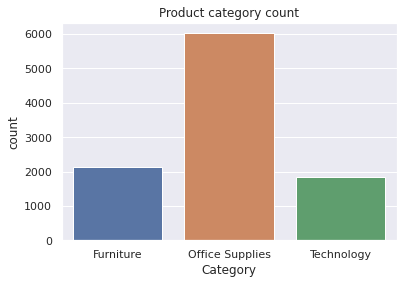

In [36]:
sns.set(style="darkgrid")       
genderCount  = sns.countplot(x="Category", data =df_sales).set_title("Product category count")

## Quantidade de produtos vendidos por subcategoria

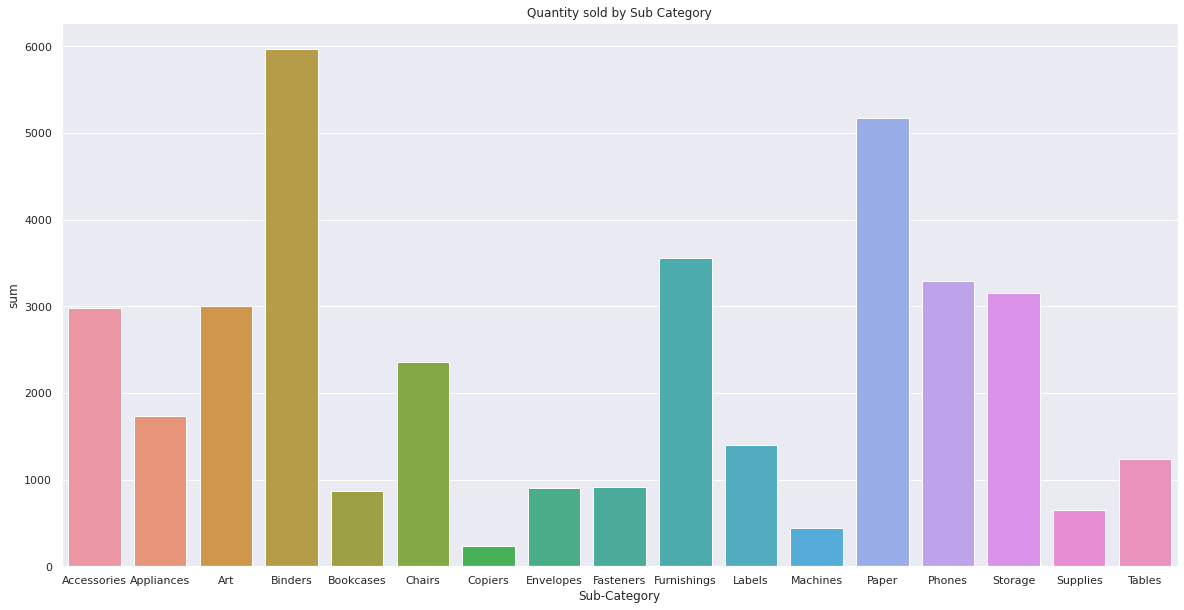

In [96]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})
df_quantity_per_subcategory = df_sales.groupby(['Sub-Category'])['Quantity'].agg({'sum'})
genderCount = sns.barplot(x=df_quantity_per_subcategory.index, y='sum',data =df_quantity_per_subcategory).set_title("Quantity sold by Sub Category")

In [95]:
df_sales.groupby(['Sub-Category'])['Quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Accessories,775.0,3.840000,2.284698,1.0,2.0,3.0,5.0,14.0
Appliances,466.0,3.710300,2.123038,1.0,2.0,3.0,5.0,14.0
Art,796.0,3.768844,2.131957,1.0,2.0,3.0,5.0,14.0
Binders,1523.0,3.922521,2.291913,1.0,2.0,3.0,5.0,14.0
Bookcases,228.0,3.807018,2.283352,1.0,2.0,3.0,5.0,13.0
Chairs,617.0,3.818476,2.282652,1.0,2.0,3.0,5.0,14.0
Copiers,68.0,3.441176,1.831583,1.0,2.0,3.0,5.0,9.0
Envelopes,254.0,3.566929,2.045299,1.0,2.0,3.0,5.0,9.0
Fasteners,217.0,4.211982,2.413551,1.0,2.0,4.0,5.0,14.0


Algumas estatísticas sobre a quantidade de produtos vendidos por subcategoria:

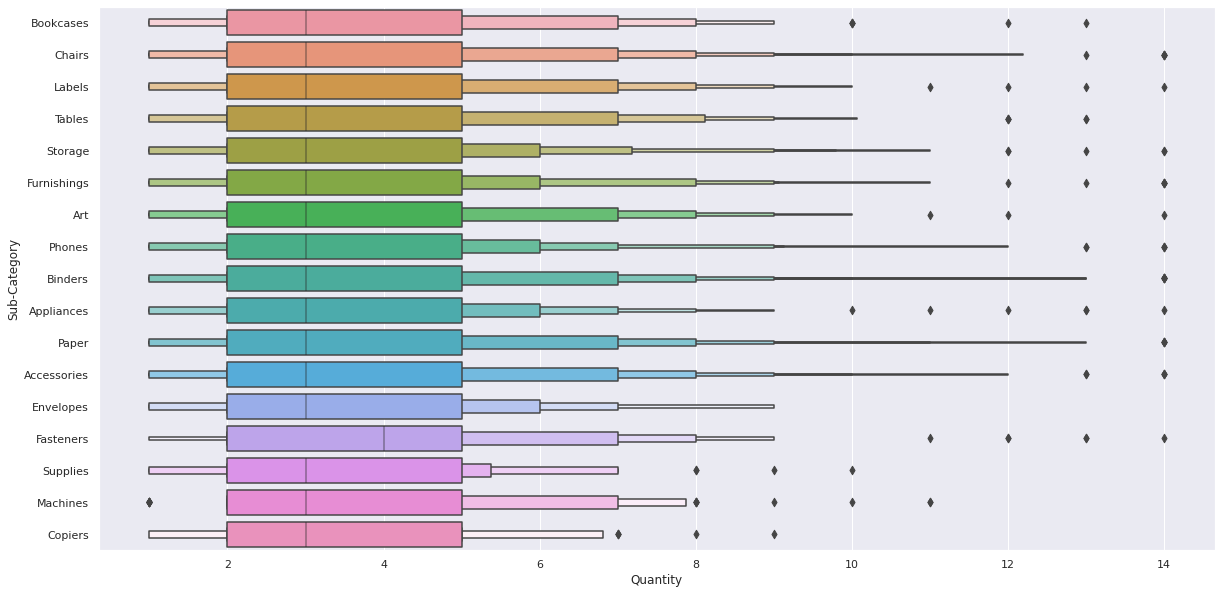

In [93]:
sns.boxenplot(y = 'Sub-Category', x = 'Quantity', data=df_sales ); 

Apesar de "Blinders" ser o produto mais vendido, a média da quantidade por venda de todos os produtos são próximas. A maior média em relação a quantidade em uma mesma venda vem do produto "Fastners".

## Quantidade de vendas por região

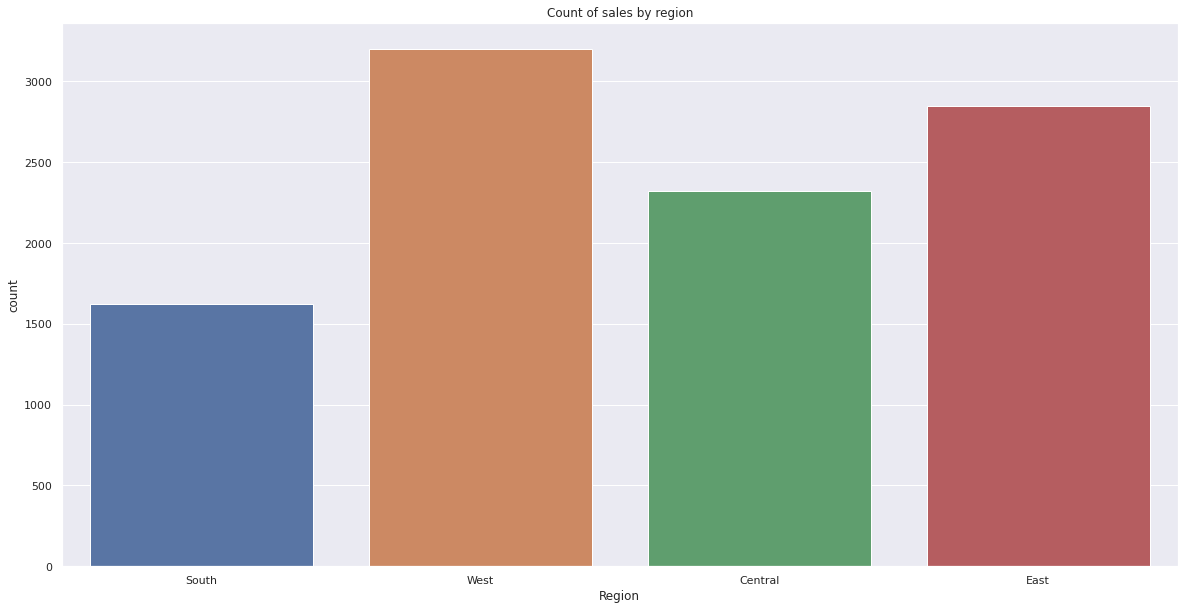

In [99]:
genderCount  = sns.countplot(x="Region", data =df_sales).set_title("Count of sales by region")

## Detecção de anomalias na quantidade de produtos vendida

In [111]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_sales['Quantity'].values.reshape(-1, 1))

IsolationForest()

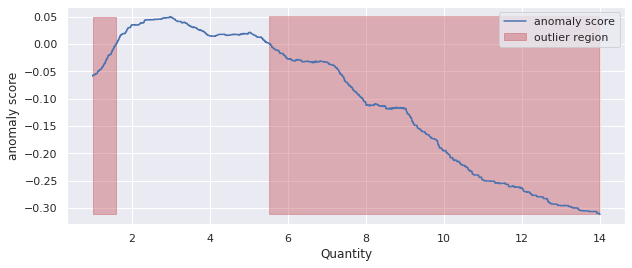

In [115]:
import numpy as np

xx = np.linspace(df_sales['Quantity'].min(), df_sales['Quantity'].max(), len(df_sales)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Quantity')
plt.show();

As compras onde são adquiridos menos de 2 produtos ou mais que 5 são consideradas anomalias para a base de dados em questão. 

In [128]:
percentual_sales = 100 * ((len(df_sales[df_sales['Quantity'] < 2]) + len(df_sales[df_sales['Quantity'] > 6]))/len(df_sales))
print('As vendas nesses moldes representam', round(percentual_sales,2), '% das vendas gerais.')

As vendas nesses moldes representam 21.91 % das vendas gerais.


Vamos analisar uma venda específica que se encaixe nesse grupo:

In [133]:
df_sales.iloc[113]

Row ID                                                114
Order ID                                   CA-2014-115259
Order Date                            2014-08-25 00:00:00
Ship Date                             2014-08-27 00:00:00
Ship Mode                                    Second Class
Customer ID                                      RC-19960
Customer Name                                  Ryan Crowe
Segment                                          Consumer
Country                                     United States
City                                             Columbus
State                                                Ohio
Postal Code                                         43229
Region                                               East
Product ID                                OFF-FA-10000621
Category                                  Office Supplies
Sub-Category                                    Fasteners
Product Name     OIC Colored Binder Clips, Assorted Sizes
Sales         

Podemos ver que é um produto da subcategoria 'Fasteners' da categoria 'Office Supplies'. Como observamos nas analises anteriores, essa categoria representa a maior fatia de vendas na base de dados. Porém a subcategoria apresenta a média de quantidade por compra mais alta, apesar de ser uma das subcategorias de produtos menos vendidas.  

## Detecção de anomalias na frequência de compras do cliente

In [151]:
df_frequency_client = df_sales.groupby('Customer ID')['Order Date'].agg({'count'})
df_frequency_client.describe()

,count
count,793.000000
mean,12.602774
std,6.242559
min,1.000000
25%,8.000000
50%,12.000000
75%,16.000000
max,37.000000


Na média cada cliente compra de 13 em 13 dias

In [144]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_frequency_client['count'].values.reshape(-1, 1))

IsolationForest()

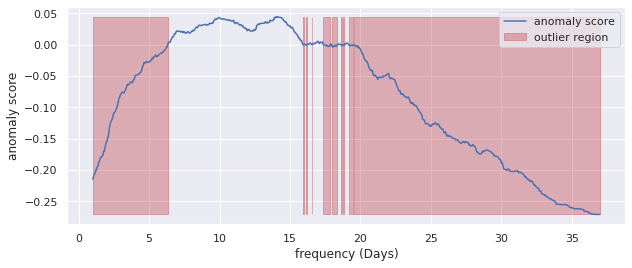

In [145]:
import numpy as np

xx = np.linspace(df_frequency_client['count'].min(), df_frequency_client['count'].max(), len(df_frequency_client)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('frequency (Days)')
plt.show();

Segundo a análise acima, frenquencias de compra menores que 6 ou maiores que 16 dias tem grandes chances de apresentar anomalias. O gráfico abaixo demonstra a situação explicitada:

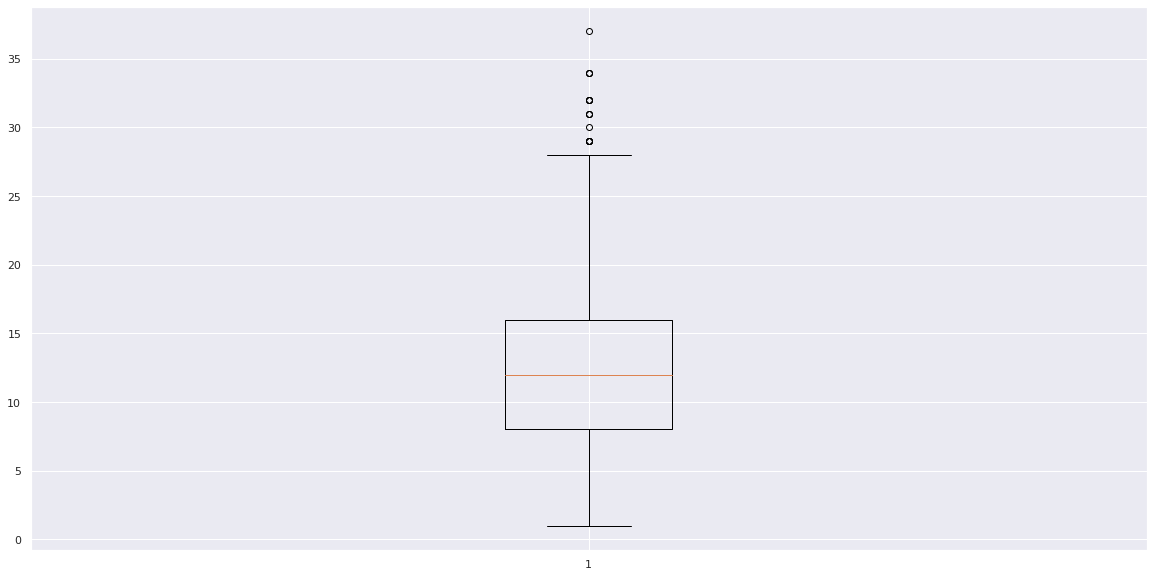

In [148]:
plt.boxplot(df_frequency_client);

Apesar de o modelo indicar a presença de uma anomalia, não é possível afirmar isso uma vez que frequencias fora do intervalo de 6 a 16 podem apenas representar outliers.